In [7]:
# 2.1 Import libraries.
import math
import os
from six.moves import xrange  # pylint: disable=redefined-builtin
import numpy as np
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from keras.preprocessing.image import ImageDataGenerator
from scipy.misc import imresize

%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
# Directory to put the training/test data.
TRAIN_DIR='mountain-and-road/train'
TEST_DIR  = 'mountain-and-road/test'

In [9]:
test_batches  = ImageDataGenerator().flow_from_directory(TEST_DIR , target_size=(28,28), classes=['mountain','road'], batch_size=1)

Found 36 images belonging to 2 classes.


In [22]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1]!=3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims) //rows if len(ims)%2 ==0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

INFO:tensorflow:Restoring parameters from mountain-and-road/train/checkpoint-1999
        Actual Output: Mountain Bike
     Predicted Output: Road Bike
Prediction Confidence: 1.0


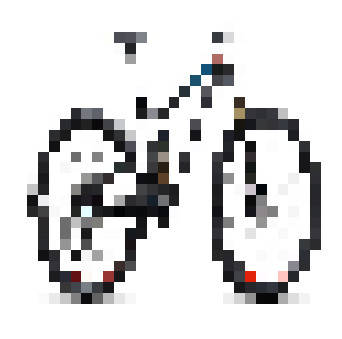

In [31]:
# 2.8 Run evaluation based on the saved checkpoint.
with tf.Session(graph=tf.Graph()) as sess:
    saver = tf.train.import_meta_graph(
        os.path.join(TRAIN_DIR, "checkpoint-1999.meta"))
    saver.restore(
        sess, os.path.join(TRAIN_DIR, "checkpoint-1999"))

    # Retrieve the Ops we 'remembered'.
    Y = tf.get_collection("Y")[0]
    X = tf.get_collection("images")[0]
    y_ = tf.get_collection("labels")[0]
    
    # Perform prediction
    images_feed, labels_feed = next(test_batches)
    prediction = sess.run(Y, feed_dict={X: images_feed,
                                        y_:labels_feed})
    plots(images_feed)
    predicted_output = ""
                 
    print("        Actual Output: " + ("Mountain Bike" if (labels_feed[0][0]==1) else "Road Bike"))    
    print("     Predicted Output: " + ( "Mountain Bike" if (prediction[0][0]>0.6) else "Road Bike"))
    print("Prediction Confidence: " + (str(prediction[0][0]) if (prediction[0][0]>prediction[0][1]) else str(prediction[0][1])))
    